In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [14]:

# Load dataset
dataset = pd.read_csv('Mall_Customers.csv')

# Selecting features for clustering
X = dataset.iloc[:, [3, 4]].values  # Annual Income (index 3) and Spending Score (index 4)

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the elbow method to find the optimal number of clusters
wcss = []
silhouette_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    if i > 1:
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Optimal number of clusters based on the elbow method (visual inspection)
optimal_k = 5

# Applying K-means to the dataset with optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Compute Silhouette score with optimal K
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
#print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

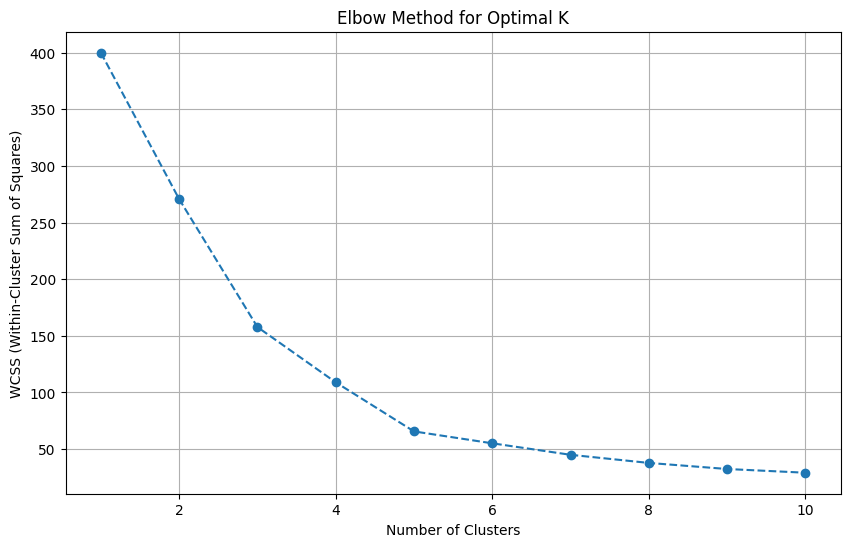

In [6]:
# Visualizing the Elbow Method result (WCSS)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

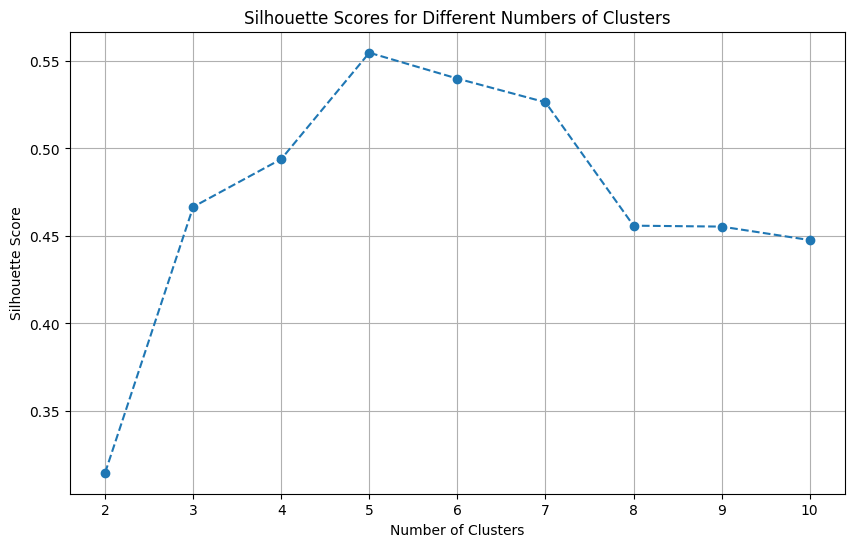

In [7]:
# Visualizing the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid()
plt.show()

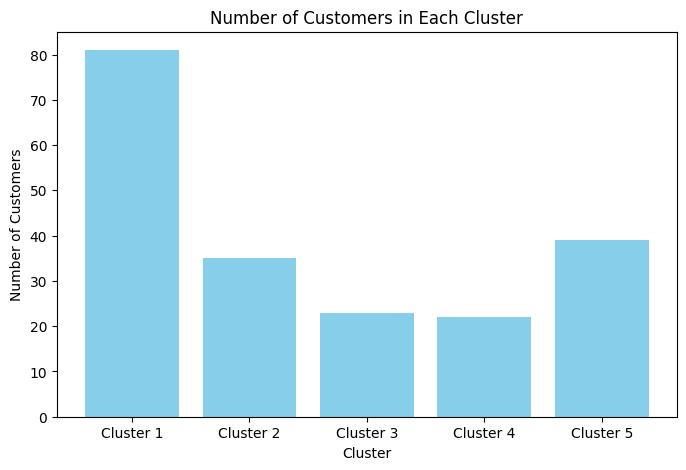

In [8]:
# Plotting the Bar Chart of cluster sizes
cluster_counts = np.bincount(y_kmeans)
plt.figure(figsize=(8, 5))
plt.bar(range(len(cluster_counts)), cluster_counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Cluster')
plt.xticks(range(len(cluster_counts)), ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.show()

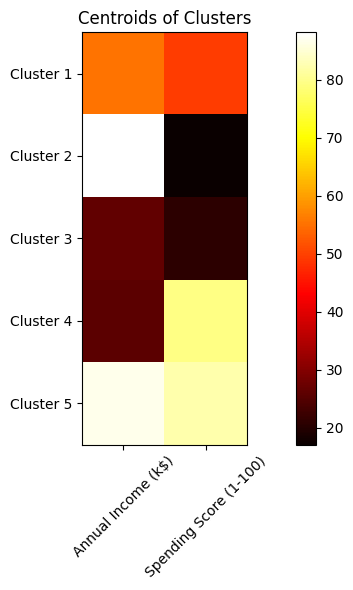

In [9]:
# Inverse transform centroids to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Plotting the Heatmap of centroids
plt.figure(figsize=(10, 6))
plt.imshow(centroids, interpolation='nearest', cmap='hot')
plt.colorbar()
plt.title('Centroids of Clusters')
plt.xticks(range(X.shape[1]), dataset.columns[[3, 4]], rotation=45)
plt.yticks(range(len(centroids)), ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


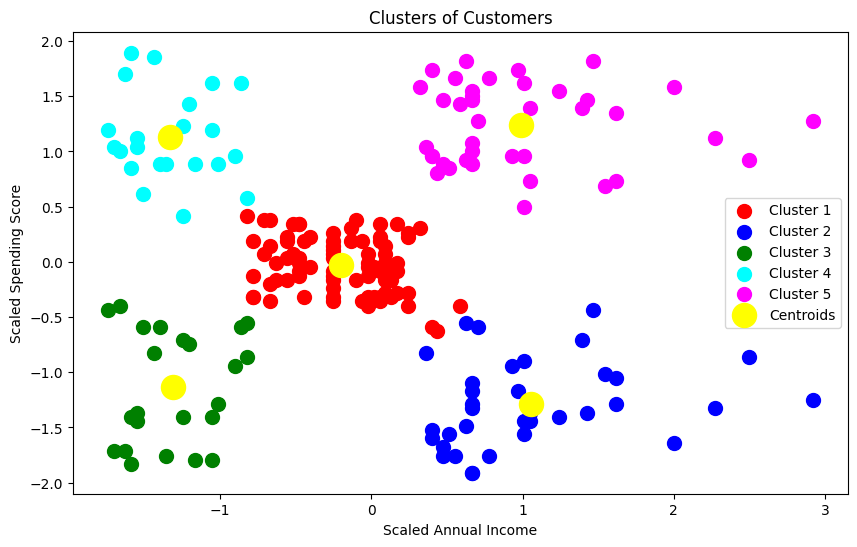

In [11]:
# Applying K-means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.title('Clusters of Customers')
plt.legend()
plt.show()


In [13]:
from sklearn.metrics import silhouette_score

# Compute Silhouette score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")

Silhouette Score for 5 clusters: 0.5546571631111091
